# Evaluation Project 10 - Agriculture Dataset

Objective - To develop an ML model to predict crop damage category i.e 0 or 1 or 2

Approach - Since target variable is categorical in nature hence classification approach will be more suiteable.


# Importing required Libraries

# All commonly used libs are imported using pyforest

In [1]:
!pip install pyforest
import pyforest

# Importing Datasets

In [2]:
from google.colab import files # uploading dataset
uploaded = files.upload()
import io
ag = pd.read_csv(io.BytesIO(uploaded['agri.csv']))

Saving agri.csv to agri (4).csv


<IPython.core.display.Javascript object>

# Loading Datasets

In [3]:
ag.head() # Checking Head section

,Unnamed: 0,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Identify
0,0,F00000001,188,1,0,1,0,0.0,0,1,0.0,Train
1,1,F00000003,209,1,0,1,0,0.0,0,2,1.0,Train
2,2,F00000004,257,1,0,1,0,0.0,0,2,1.0,Train
3,3,F00000005,257,1,1,1,0,0.0,0,2,1.0,Train
4,4,F00000006,342,1,0,1,0,0.0,0,2,1.0,Train


In [4]:
ag.tail() #Checking tail

,Unnamed: 0,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Identify
5793,5793,F00003133,1132,0,1,2,40,34.0,7,3,NaN,Test
5794,5794,F00003135,1132,0,1,2,40,25.0,3,1,NaN,Test
5795,5795,F00003138,1132,0,1,2,20,13.0,23,1,NaN,Test
5796,5796,F00003149,1212,0,1,2,10,35.0,5,1,NaN,Test
5797,5797,F00003150,1212,0,1,2,15,NaN,20,3,NaN,Test


In [5]:
ag.sample(5)

,Unnamed: 0,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Identify
3731,3731,F00006554,1898,0,0,2,30,NaN,9,1,0.0,Train
350,350,F00000646,2688,0,0,3,40,56.0,0,2,1.0,Train
2632,2632,F00004616,411,0,0,3,40,34.0,0,1,0.0,Train
1333,1333,F00002348,3702,0,0,2,20,50.0,13,2,1.0,Train
2055,2055,F00003554,2016,0,1,2,20,24.0,29,3,0.0,Train


Dataset found to be loaded correctly with additional column added to identify test & train data

# Performing EDA

In [6]:
ag.shape # Checking shape of the dataset

(5798, 12)

In [7]:
ag[ag['Identify']=='Test']['Identify'].count() # Checking test data set

1199

In [8]:
ag[ag['Identify']=='Train']['Identify'].count() # Checking train dataset

4599

Dataset has 1199 rows for test & 4599 rows for training

In [9]:
# Checking Null values
print(ag.isnull().sum())

Unnamed: 0                    0
ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
Identify                      0
dtype: int64


Only Number_weeks_Used column has the Nan values
Crop damage has Null values equal to the no of rows in test dataset, which are due to concatinating both datasets

In [10]:
ag.info() # Check Null values with Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               5798 non-null   int64  
 1   ID                       5798 non-null   object 
 2   Estimated_Insects_Count  5798 non-null   int64  
 3   Crop_Type                5798 non-null   int64  
 4   Soil_Type                5798 non-null   int64  
 5   Pesticide_Use_Category   5798 non-null   int64  
 6   Number_Doses_Week        5798 non-null   int64  
 7   Number_Weeks_Used        5237 non-null   float64
 8   Number_Weeks_Quit        5798 non-null   int64  
 9   Season                   5798 non-null   int64  
 10  Crop_Damage              4599 non-null   float64
 11  Identify                 5798 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 543.7+ KB


ID & Identify column have object data type rest is numeric datatype

<IPython.core.display.Javascript object>

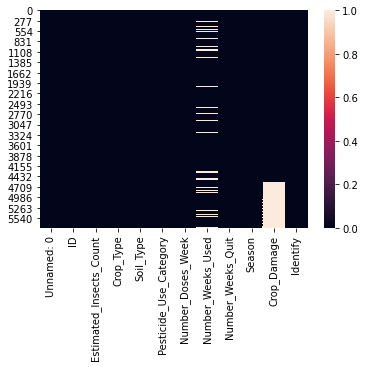

In [11]:
sns.heatmap(ag.isnull()) # Visually confirming null values

It can be seen from heatmap as well. The No of weeks has NaN values scatterred in both datasets though in Crop Damage column the Nan Values are only in Test dataset bottom part of the dataset

In [12]:
ag.nunique() # Checking no of unique entries or entropy in dataset in the dataset

Unnamed: 0                 5798
ID                         5798
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
Identify                      2
dtype: int64

Unnamed: 0, ID Column is totally unique, which will not allow model to learn precisely, hence can be droped

In [13]:
# droping the unnecessary columns
ag.drop(['Unnamed: 0', 'ID'], axis =1, inplace = True)

In [14]:
ag.columns # Confirming column drop

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'Identify'],
      dtype='object')

List of columns confirm both columns droped

In [15]:
# Stats summary of the data
ag.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5237.000000,5798.000000,5798.000000,4599.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.920374,8.760262,1.891687,0.194390
std,821.330403,0.413280,0.499271,0.484594,15.655508,12.625594,9.582781,0.692997,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.000000,6.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,15.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Significant difference between 75% & max values at instect count, No of doses week, No weeks used, No of weeks quit
Mean > Median Insect count, Number does per week, number weeks used
Median > Mean in No of weeks quit
Data is highly spreaded in Insect count, No of dese per week

In [16]:
ag.skew()# Checking skewness

Estimated_Insects_Count    0.948378
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week          0.929452
Number_Weeks_Used          0.253129
Number_Weeks_Quit          0.972163
Season                     0.147252
Crop_Damage                2.306933
dtype: float64

'Estimated_Insects_Count', 'Crop_Type', 'Pesticide_Use_Category', 'Number_Doses_Week','Number_Weeks_Quit', 'Crop_Damage' has skewness greater than +/-0.5 (All have positive skewness)

# Visualization

Univeriate Analysis

<IPython.core.display.Javascript object>

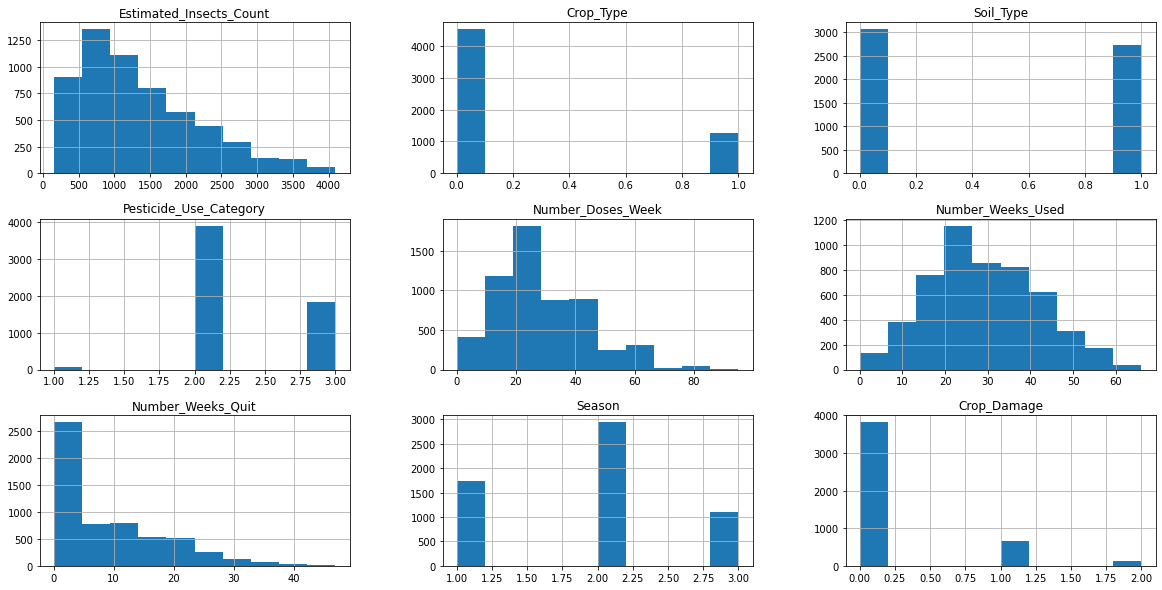

In [17]:
ag.hist(figsize = (20,10))
plt.show()

Hist plot shows right tailed skewness in Estimated insect count, No of doses per week and No of weeks quit

In [18]:
(ag[ag['Crop_Damage']==0]['Crop_Type'].value_counts().sum()) # Total crop types not damaged

3820

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

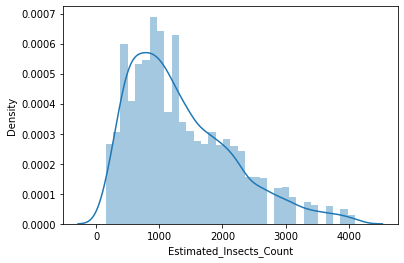

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

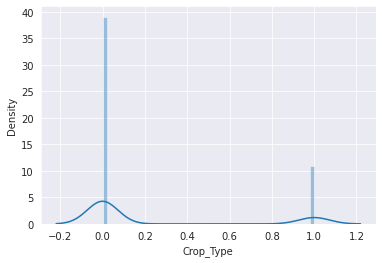

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

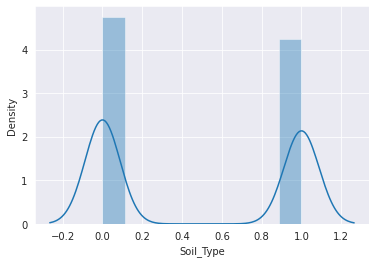

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

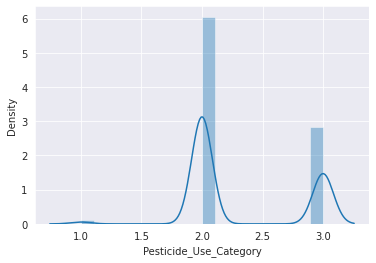

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

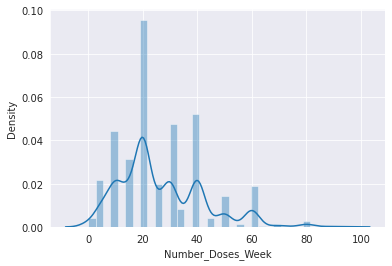

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

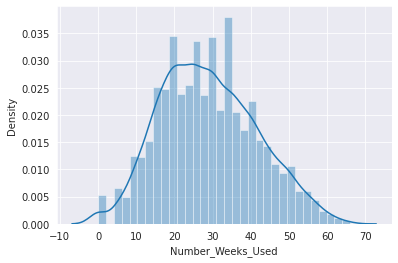

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

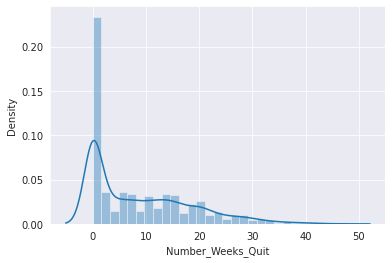

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

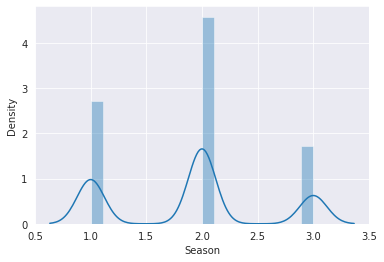

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

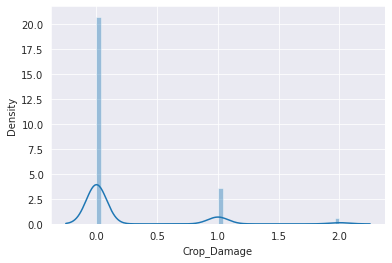

In [19]:
import warnings
warnings.filterwarnings('ignore')
for i in ag.describe().columns:
    sns.distplot(ag[i])
    sns.set_style('darkgrid')
    plt.show()

As depicted by skewness calcuation & historam ,skewness distribution graph also shows right sided tail which can be treated before training the model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

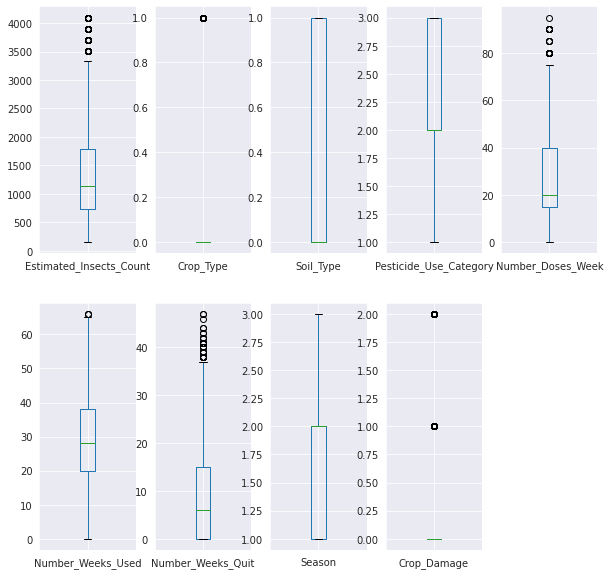

In [20]:
# To check outliers
ag.plot( kind = 'box', subplots = True, layout =(2,5), figsize=(10,10))
sns.set_style('darkgrid')
plt.show()

As seen in stats summary insect count, Number doses week, Number weeks used and number weeks quit has outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

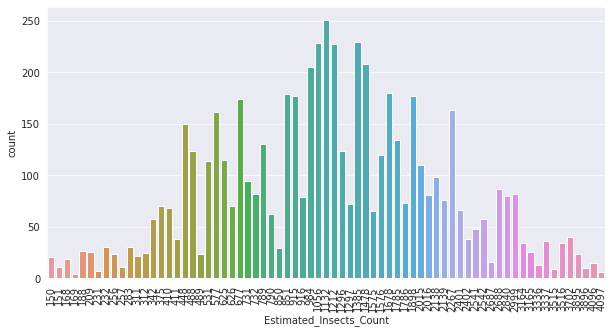

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

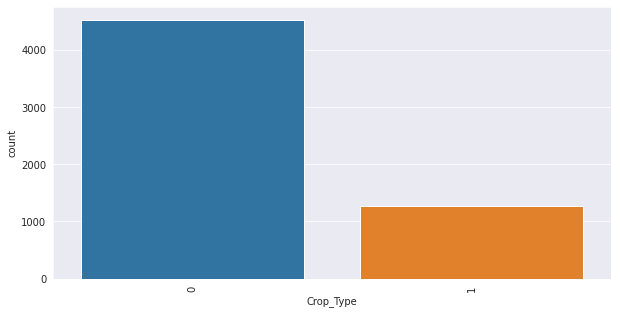

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

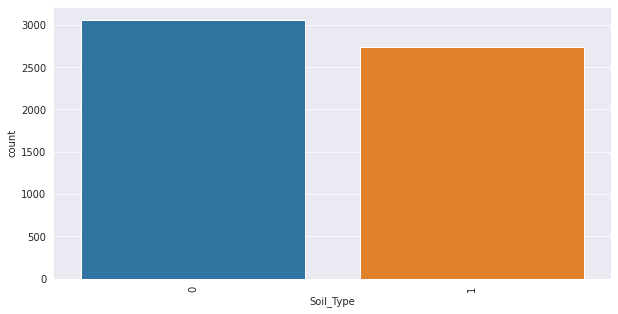

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

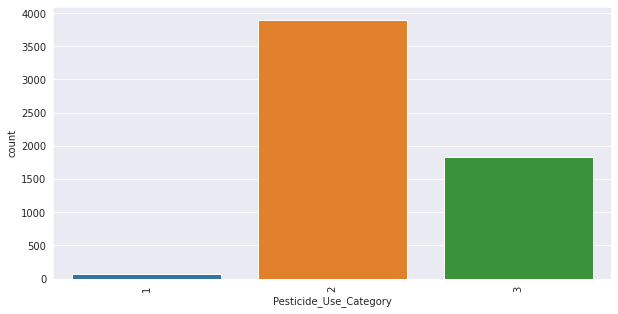

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

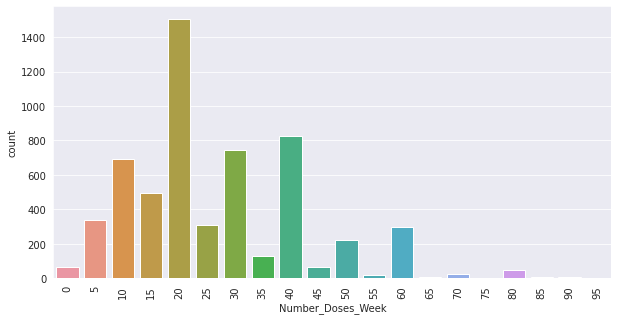

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

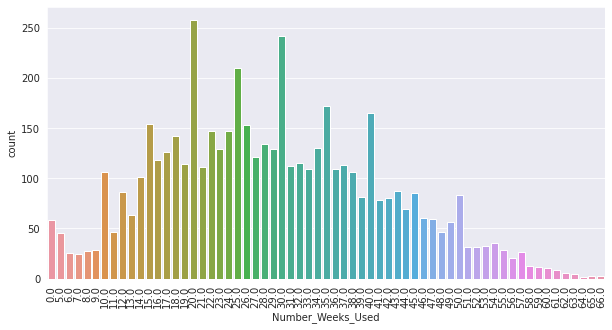

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

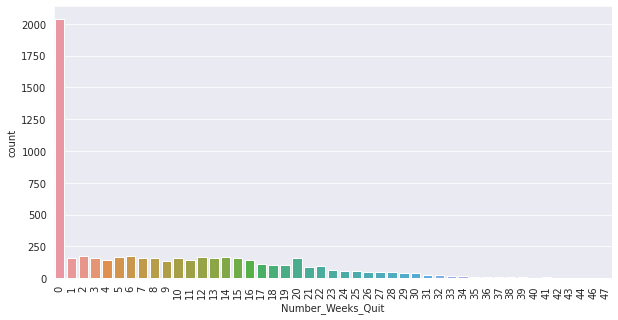

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

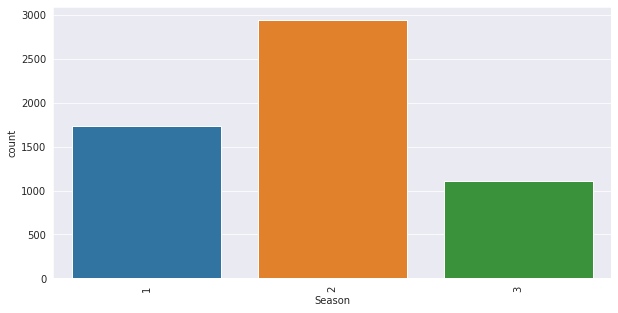

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

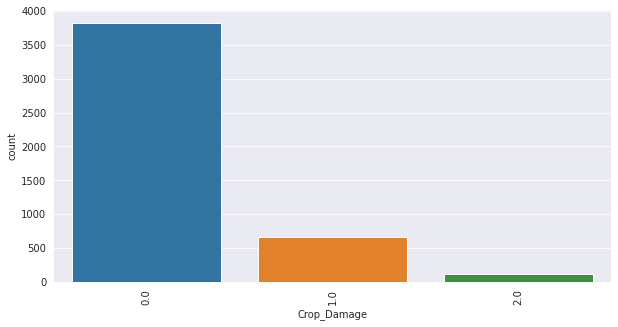

In [21]:
for i in ag.describe().columns:
    plt.figure(figsize=(10,5))
    sns.countplot(ag[i])
    plt.xticks(rotation =90)
    sns.set_style('darkgrid')
    plt.show()

1. Not damaged crop count is high, this bring imbalance to the data which shall be treated for training model.
2. In no of weeks quit 0 appears most indicating pesticide is used often
3. 20 doses per week is the max doses sprayed
4. Cat2 pesticides are used more often
5. Both soil types are used frequently
6. Crop type 0 is cultivated more often

Bivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

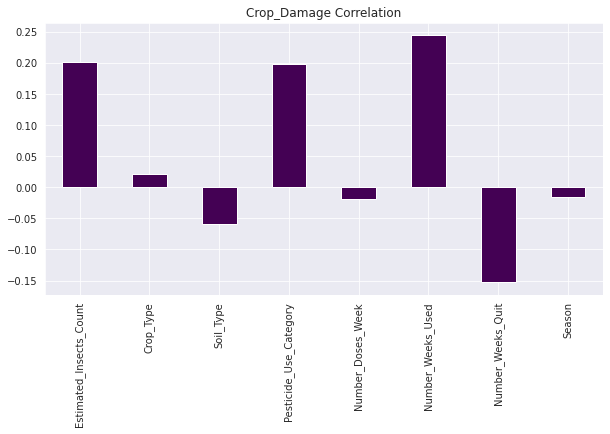

In [22]:
#Checking coorelation
plt.figure(figsize = (10,5))
ag.drop('Crop_Damage',axis=1).corrwith(ag['Crop_Damage']).plot(kind='bar', cmap ='viridis')
plt.title('Crop_Damage Correlation')
sns.set_style('darkgrid')
plt.show()

Insect Count, Pesticide use category and No. of week used have strong positive coorelation with Crop Damage where as NO. of weeks quit and soil type are seen to have strong negative coorelation.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

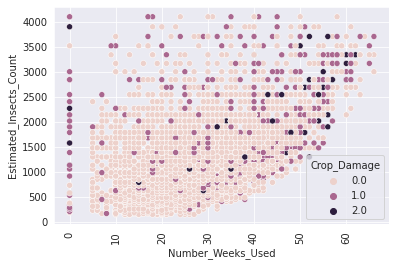

In [23]:
sns.scatterplot(ag.Number_Weeks_Used, ag.Estimated_Insects_Count, hue = ag.Crop_Damage)
plt.xticks(rotation=90)
plt.show()

As Number of weeks used & the insect count increases corp damage density tends to increase showing the positive coorelation 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

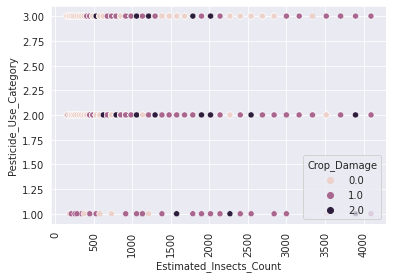

In [24]:
sns.scatterplot(ag.Estimated_Insects_Count, ag.Pesticide_Use_Category, hue = ag.Crop_Damage)
plt.xticks(rotation=90)
plt.show()

As insect count is increasing crop damage shows increasing trend for different categories

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

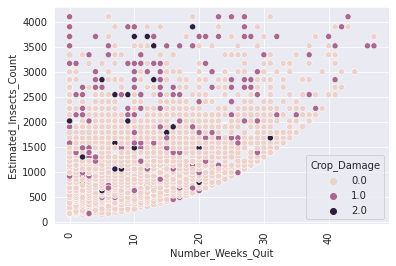

In [25]:
sns.scatterplot(ag.Number_Weeks_Quit, ag.Estimated_Insects_Count, hue = ag.Crop_Damage)
plt.xticks(rotation=90)
plt.show()

As the number of weeks quit is increasing, Estimated Insects count is also increasing where as density of damage is reducing as shown in correlation graph

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

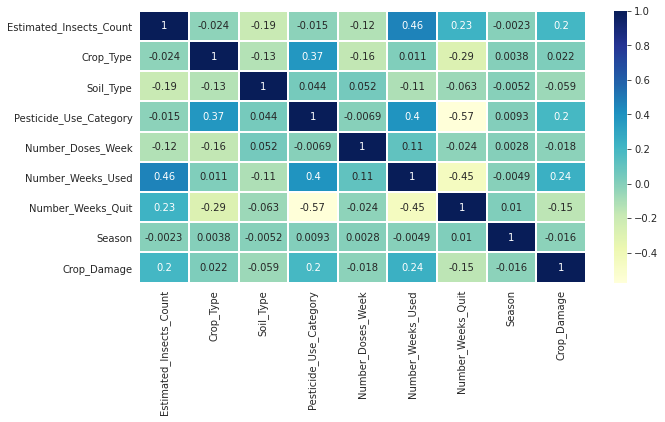

In [26]:
# Calculating & Ploting Correlation values
plt.figure(figsize = (10,5))
sns.heatmap(ag.corr(),annot =True, cmap = 'YlGnBu',linewidths=1)
plt.show()

As shown by correlation graph Crop damage has strong positive coorelation with Insect count, Pesticide use category and Number weeks used

Conclusion from EDA:
1. Only Number_weeks_Used column has the Nan values Crop damage has Null values equal to the no of rows in test dataset, which are due to concatinating both datasets
2. 'Estimated_Insects_Count', 'Crop_Type', 'Pesticide_Use_Category', 'Number_Doses_Week','Number_Weeks_Quit', 'Crop_Damage' has skewness greater than +/-0.5 (All have positive skewness)
3. As seen in stats summary insect count, Number doses week, Number weeks used and number weeks quit has outliers
Insect Count, Pesticide use category and No. of week used have strong positive coorelation with Crop Damage where as NO. of weeks quit and soil type are seen to have strong negative coorelation.


Data Cleaning & Preprocessing

In [27]:
# Replacing Nan with mean
ag['Number_Weeks_Used'] = ag['Number_Weeks_Used'].replace(np.NaN, ag['Number_Weeks_Used'].mean())

<IPython.core.display.Javascript object>

# Building Model

Preparing data for dependent & independent variables

In [28]:
# importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from sklearn.preprocessing import power_transform

In [43]:
# Segrigating data into x & y
train = ag.loc[ag['Identify']== 'Train']
test = ag.loc[ag['Identify']== 'Test']
x = (train.drop(['Crop_Damage','Identify'], axis = 1))
y = (pd.DataFrame(train['Crop_Damage'])).astype(int)
test_data = (test.drop(['Crop_Damage','Identify'], axis = 1))
x = power_transform(x,method = 'yeo-johnson')
ssc = StandardScaler()
x = ssc.fit_transform(x)

<IPython.core.display.Javascript object>

In [44]:
print(x.shape)
print(y.shape)
print(test_data.shape)

(4599, 8)
(4599, 1)
(1199, 8)


In [31]:
#Identifying best random state
import warnings
warnings.filterwarnings('ignore')
best_r_state = 0
accu = 0
for i in range (30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2, random_state = i)
    svc =RandomForestClassifier()
    svc.fit(x_train,y_train)
    predsvc = svc.predict(x_test)
    svc.score(x_train,y_train)
    tempaccu = accuracy_score(y_test,predsvc)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f'For accuracy is {accu * 100}% best random state is {best_r_state}')

For accuracy is 83.91304347826087% best random state is 70


In [45]:
# Identifying best algorithm
list=[KNeighborsClassifier(), RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier(), xgboost.XGBClassifier(), GradientBoostingClassifier(), GaussianNB(),SVC()]
for m in list:
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2, random_state = 70)
  m.fit(x_train,y_train)
  pred = m.predict(x_test)
  cv_score = cross_val_score(m,x_train,y_train,cv= 10).mean()
  print(f'For algorithm {m} cross validation score is {round(cv_score*100)}\n')
  print(f'For algorithm {m} Accuracy Score is {round(accuracy_score(y_test,pred)*100)}')
  print('****************************************************************************')

For algorithm KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') cross validation score is 82

For algorithm KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') Accuracy Score is 83
****************************************************************************
For algorithm RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=Non

AdaBoost classifier, XGBClassifier, Gradient Boosting classifier and SVC deliver's best CV scores of 85%

In [46]:
# Hyperparameter tuning for AdaBoost classifier
from sklearn.model_selection import GridSearchCV
parameters = {'algorithm':['SAMME','SAMME.R'], 'n_estimators':range(0,100)}
clf = GridSearchCV(AdaBoostClassifier(),parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 8}

In [47]:
# Developing AdaBoostClassifier model with best parameters
adb = AdaBoostClassifier(algorithm= 'SAMME.R', n_estimators=8)
adb.fit(x_train,y_train)
pred = adb.predict(x_test)
print(f'Accuracy Score is {round(accuracy_score(y_test,pred)*100)}%')
print('****************************************************************************')
print(f'Confusion matrix is \n {confusion_matrix(y_test,pred)}')
print('****************************************************************************')
print(f'Classification report is \n {classification_report(y_test,pred)}')
print('****************************************************************************')
print(f'Mean CV Score is {round((cross_val_score(m,x,y,cv= 10).mean())*100)}%')

Accuracy Score is 84%
****************************************************************************
Confusion matrix is 
 [[760  18   0]
 [113  13   0]
 [ 14   2   0]]
****************************************************************************
Classification report is 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       778
           1       0.39      0.10      0.16       126
           2       0.00      0.00      0.00        16

    accuracy                           0.84       920
   macro avg       0.42      0.36      0.36       920
weighted avg       0.78      0.84      0.79       920

****************************************************************************
Mean CV Score is 81%


Hyperparameter tunning has not brought much changes to the algorithm's performance the the algorithm

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

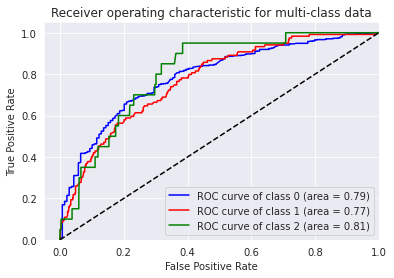

In [48]:
# Redrawing ROC Curve with Label binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=38)

classifier = OneVsRestClassifier(AdaBoostClassifier(algorithm= 'SAMME.R', random_state= 8))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

**Conclusion** - The best performing model is 'Adaboost classifier' with 81% CV score & 79% probability of prediction for damaged crops

**Saving the best Model**

In [49]:
import joblib
joblib.dump(adb, 'Crop_prediction.obj')

['Crop_prediction.obj']

In [50]:
crop_pred = joblib.load('Crop_prediction.obj')
crop_pred

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=8, random_state=None)

In [51]:
# using the model to test
pred = crop_pred.predict(test_data)

<IPython.core.display.Javascript object>

(array([   0.,    0.,    0.,    0.,    0., 1199.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

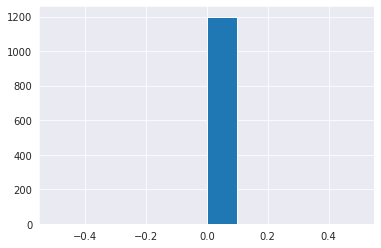

In [52]:
plt.hist(pred)

In [53]:
ypred_ag = pd.DataFrame(pred)
ypred_ag.values

<IPython.core.display.Javascript object>

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [54]:
ypred_ag.to_csv('predicted_values.csv')